In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df.set_index('Customer', inplace=True)


customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [5]:
categoricals.describe()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


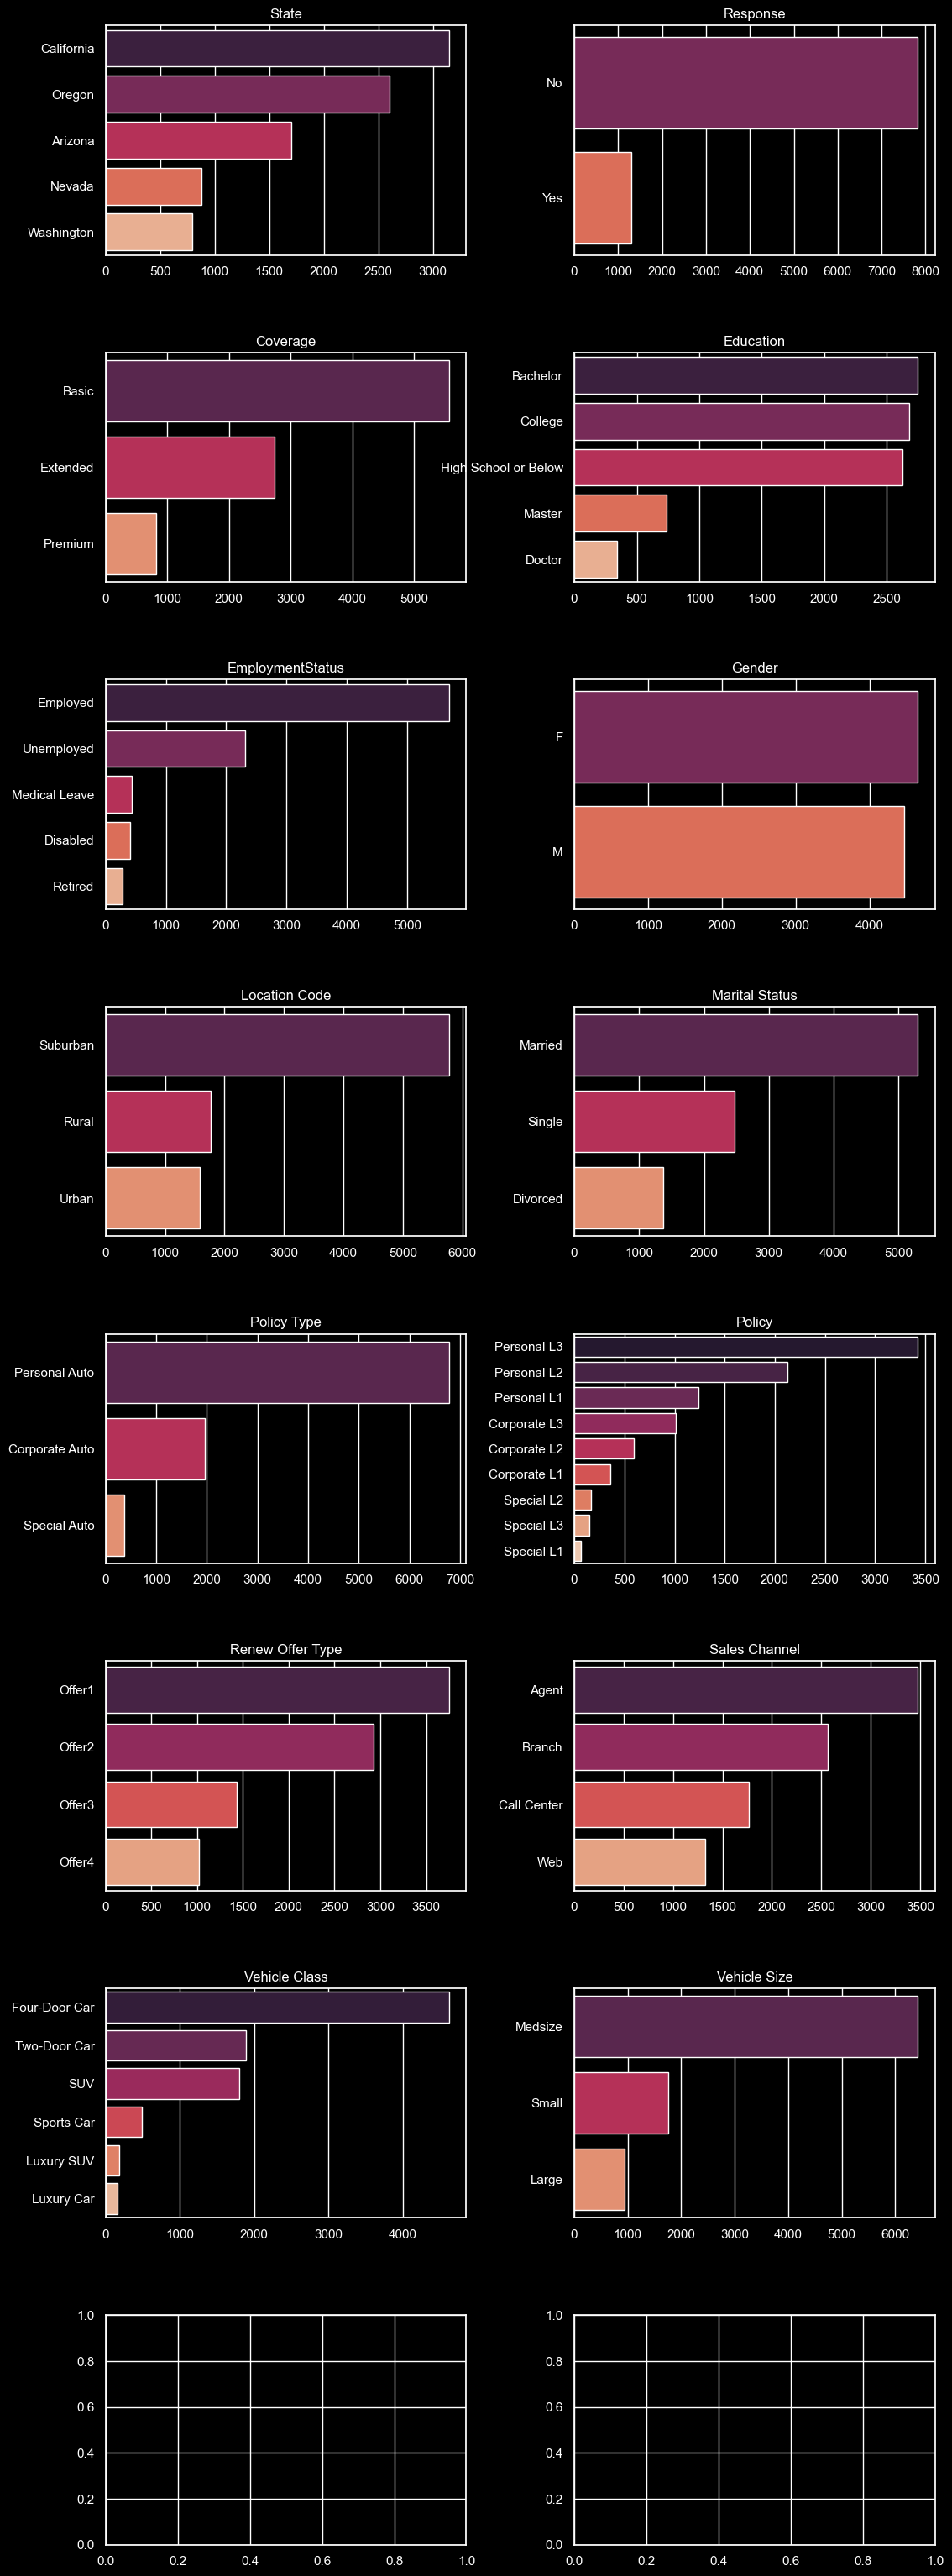

In [7]:
sns.set(style="darkgrid")
plt.style.use("dark_background")

categoricals_plotted = categoricals.columns.drop(["Effective To Date"])

n = len(categoricals_plotted)
ncolumns= 2
nrows = n // ncolumns + (n + ncolumns > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncolumns, figsize=(12, nrows * 4))
fig.tight_layout(pad=5.0)

for i, var in enumerate(categoricals_plotted):
    row = i // ncolumns
    col = i % ncolumns
    ax = axes[row, col] if nrows > 1 else axes[col]
    sns.countplot(y=var, data=categoricals, ax=ax, palette="rocket", order=categoricals[var].value_counts().index)
    ax.set_title(var, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

if n % ncolumns != 0:
    for idx in range(n, nrows * ncolumns):
        axes.flat[idx].set_visible(False)

plt.show()

In [8]:
policy_relationship = pd.crosstab(index=categoricals['Policy Type'], columns=categoricals['Policy'])

policy_relationship

Policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
Policy Type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


In this scenario, "Policy" serves as a detailed subcategory within each "Policy Type," ensuring no overlap between different policy types and their respective policies. This structure supports the retention of both variables, as "Policy Type" provides a broad overview suitable for general analysis, while "Policy" offers deeper insights essential for targeted strategies and specific policy performance evaluations.

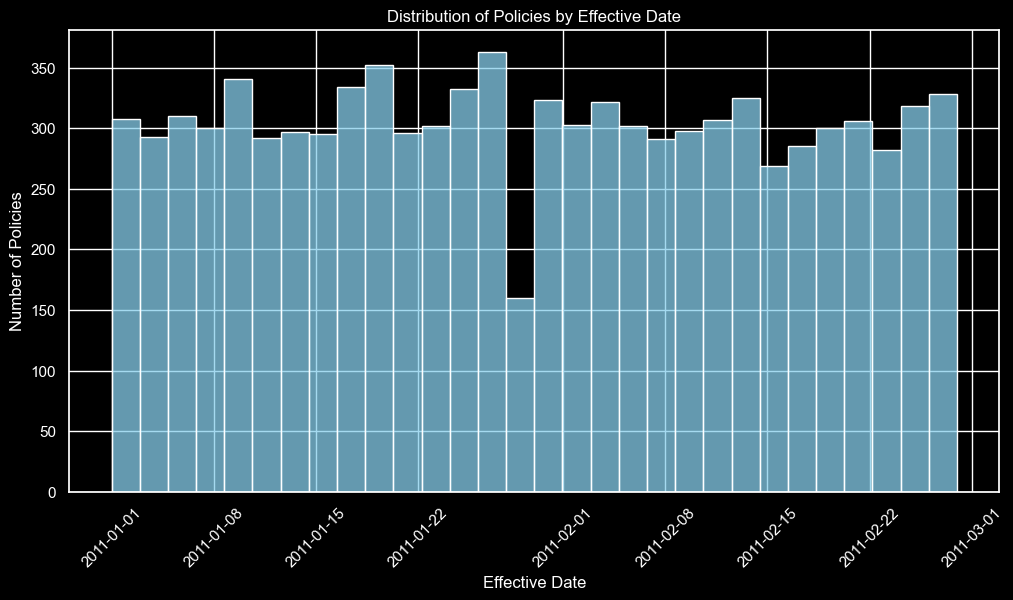

In [9]:
categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'])

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(categoricals['Effective To Date'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Policies by Effective Date')
plt.xlabel('Effective Date')
plt.ylabel('Number of Policies')
plt.xticks(rotation=45)
plt.show()

Uniform Distribution: The consistent spread indicates that new policies are being initiated evenly throughout the two-month period, without significant peaks or troughs.

No Seasonal Bias: Within this two-month window, there is no apparent seasonal or time-specific bias towards when policies are started.

Data Collection Window: The data is confined to the beginning of 2011, restricting any analysis of long-term time trends or seasonality to this specific period. It remains uncertain if this distribution pattern persists across multiple years or varies at different times of the year.